In [ ]:
impo

In [1]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("/content/ways.csv")

# Display the first few rows and the columns and their data types to understand the data structure
print("DataFrame head:")
display(df.head())
print("\nDataFrame info:")
display(df.info())

DataFrame head:


,way_id,lat,lon,distance
0,1,21.037674,105.860399,7521.7
1,2,21.039297,105.847156,6124.4
2,3,21.026721,105.836682,5934.9
3,4,21.018868,105.843100,4659.1
4,5,21.025180,105.854185,4345.5



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9875 entries, 0 to 9874
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   way_id    9875 non-null   int64  
 1   lat       9875 non-null   float64
 2   lon       9875 non-null   float64
 3   distance  9875 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 308.7 KB


None

In [2]:
# Round the 'distance' column to the nearest integer
df['rounded_distance'] = df['distance'].round().astype(int)

# Group by rounded distance and count the number of unique way_ids
distance_counts = df.groupby('rounded_distance')['way_id'].nunique().reset_index()

# Rename the count column for clarity
distance_counts.rename(columns={'way_id': 'unique_way_count'}, inplace=True)

# Display the resulting DataFrame
print("Unique way counts by rounded distance:")
display(distance_counts.head())
display(distance_counts.tail())

Unique way counts by rounded distance:


,rounded_distance,unique_way_count
0,33,1
1,171,1
2,203,1
3,208,1
4,216,1


,rounded_distance,unique_way_count
8479,72818,1
8480,72930,1
8481,73367,1
8482,74023,1
8483,74594,1


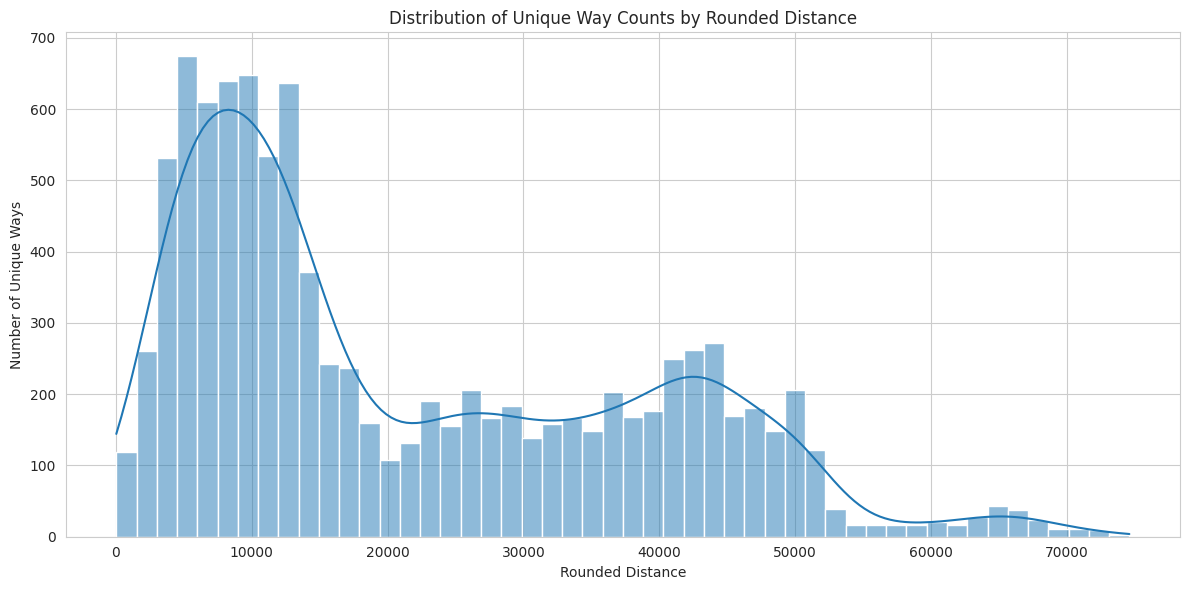

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style("whitegrid")

# Create a histogram or bar plot to visualize the distribution of rounded distances
plt.figure(figsize=(12, 6))
sns.histplot(data=distance_counts, x='rounded_distance', weights='unique_way_count', bins=50, kde=True)

# Add titles and labels
plt.title('Distribution of Unique Way Counts by Rounded Distance')
plt.xlabel('Rounded Distance')
plt.ylabel('Number of Unique Ways')

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
# Assuming the 'distance' column is in meters, convert it to kilometers
df['distance_km'] = df['distance'] / 1000

# Display the first few rows with the new column
print("DataFrame head with distance in kilometers:")
display(df.head())

DataFrame head with distance in kilometers:


,way_id,lat,lon,distance,rounded_distance,distance_km
0,1,21.037674,105.860399,7521.7,7522,7.5217
1,2,21.039297,105.847156,6124.4,6124,6.1244
2,3,21.026721,105.836682,5934.9,5935,5.9349
3,4,21.018868,105.843100,4659.1,4659,4.6591
4,5,21.025180,105.854185,4345.5,4346,4.3455


In [5]:
# Round the 'distance_km' column to the nearest integer
df['rounded_distance_km'] = df['distance_km'].round().astype(int)

# Group by rounded distance in km and count the number of unique way_ids
distance_km_counts = df.groupby('rounded_distance_km')['way_id'].nunique().reset_index()

# Rename the count column for clarity
distance_km_counts.rename(columns={'way_id': 'unique_way_count'}, inplace=True)

# Display the resulting DataFrame
print("Unique way counts by rounded distance in kilometers:")
display(distance_km_counts.head())
display(distance_km_counts.tail())

Unique way counts by rounded distance in kilometers:


,rounded_distance_km,unique_way_count
0,0,18
1,1,97
2,2,141
3,3,290
4,4,362


,rounded_distance_km,unique_way_count
71,71,6
72,72,6
73,73,5
74,74,1
75,75,1


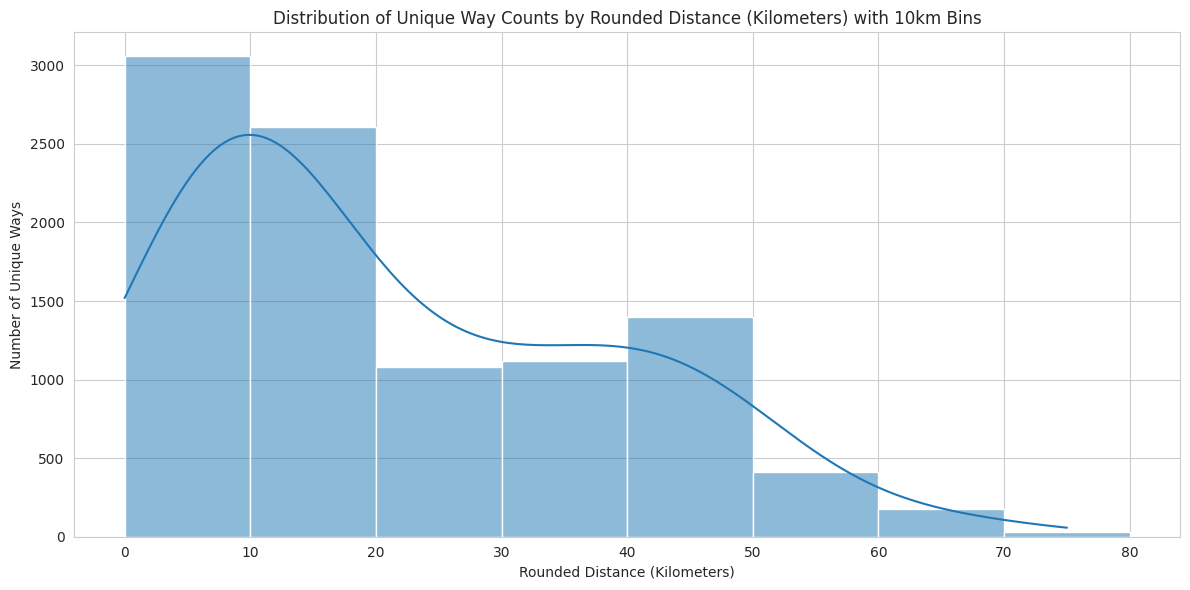

In [7]:
# Create a histogram or bar plot to visualize the distribution of rounded distances in kilometers
plt.figure(figsize=(12, 6))

# Determine the maximum distance in kilometers to set the bin range
max_distance_km = distance_km_counts['rounded_distance_km'].max()

# Use bins of 10km
bins = range(0, max_distance_km + 10, 10)

sns.histplot(data=distance_km_counts, x='rounded_distance_km', weights='unique_way_count', bins=bins, kde=True)

# Add titles and labels
plt.title('Distribution of Unique Way Counts by Rounded Distance (Kilometers) with 10km Bins')
plt.xlabel('Rounded Distance (Kilometers)')
plt.ylabel('Number of Unique Ways')

# Show the plot
plt.tight_layout()
plt.show()